The two most popular classification objectives are:

    binary:logistic - binary classification (the target contains only two classes, i.e., cat or dog)

    multi:softprob - multi-class classification (more than two classes in the target, i.e., apple/orange/banana)


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import warnings

## Columns definitions

**start_days** is number of days from the first session

**created_date** is a date of the first session of a contact

a **session** is a number of pageviews during a 30min windows

which means if you stop navigating for 30min and start again it will be a second session

In [2]:
target = "paying" # It is what we try to predict

# a file was generated for 'session_59d'
df = pd.read_csv("/vagrant/ai_random_forest_py/contacts/202402070946/segments.csv", low_memory=False) # returns DataFrame

# del df["created_date"]
# del df["id"]

# 1 if an entity is in a segment at the end of a period
# 0 (zero) if an entity is not in a segment at the end of a period
# 0 (zero) if an entity has never been in a segment

# Viewing the top 5 rows
df.head()

,created_date,id,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,...,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218,paying
0,2019-06-18,1,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2019-06-18,2,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-06-18,3,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-06-18,4,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-06-18,5,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
del df["created_date"]
del df["id"]

df.head()

,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,segm_9,segm_10,...,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218,paying
0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Create a list of the feature column's names


# print(df.shape[1] - 2)
features = df.columns[:(df.shape[1] - 1)]


# View features
print(f'Features: {features}')

df.head()

Features: Index(['segm_1', 'segm_2', 'segm_3', 'segm_4', 'segm_5', 'segm_6', 'segm_7',
       'segm_8', 'segm_9', 'segm_10',
       ...
       'segm_209', 'segm_210', 'segm_211', 'segm_212', 'segm_213', 'segm_214',
       'segm_215', 'segm_216', 'segm_217', 'segm_218'],
      dtype='object', length=218)


,segm_1,segm_2,segm_3,segm_4,segm_5,segm_6,segm_7,segm_8,segm_9,segm_10,...,segm_210,segm_211,segm_212,segm_213,segm_214,segm_215,segm_216,segm_217,segm_218,paying
0,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print('data: ', df.shape[0])
print('Paying True: ', df[df['paying'] == True].shape[0])
print('Paying False: ', df[df['paying'] == False].shape[0])


data:  2096
Paying True:  36
Paying False:  2060


The positive label considered as the minority class is Paying


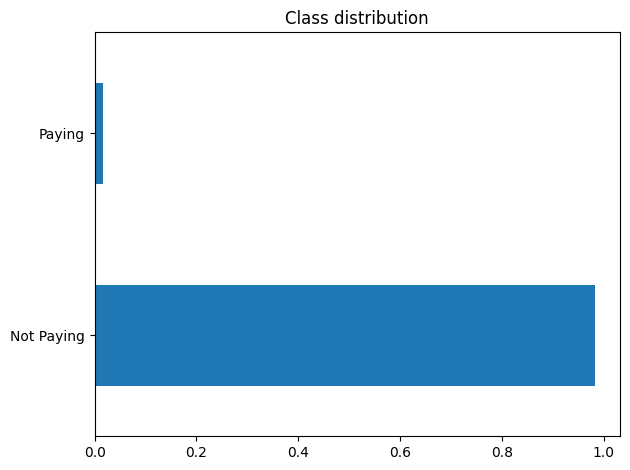

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

y_unbalances = df['paying'].to_numpy().astype('object')

y_unbalances[y_unbalances == 0] = 'Not Paying'
y_unbalances[y_unbalances == 1] = 'Paying'



class_distribution = pd.Series(y_unbalances).value_counts(normalize=True)

ax = class_distribution.plot.barh()
ax.set_title("Class distribution")

pos_label = class_distribution.idxmin()
plt.tight_layout()
print(f"The positive label considered as the minority class is {pos_label}")

We have **Unbalanced Data**

An unbalanced dataset is one in which the target variable has more observations in one specific class than the others.


[SMOTE doc](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)


In [7]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

def plot_resampling(X, y, sampler, ax):
    """Plot the resampled dataset using the sampler."""
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    sns.despine(ax=ax, offset=10)
    ax.set_title(f"Decision function for {sampler.__class__.__name__}")
    return Counter(y_res)

In [8]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score

def plot_decision_function(X, y, sampler):
    """Plot the decision function of the classifier and the original data"""

    x_new, y_new = sampler.fit_resample(X, y)

    #y_smote = y_new.to_numpy().astype('object')

    #y_smote[y_smote == 0] = 'Not Paying'
    #y_smote[y_smote == 1] = 'Paying'
    
    #class_distribution = pd.Series(y_smote).value_counts(normalize=True)
    
    #ax = class_distribution.plot.barh()
    #ax.set_title("Class distribution")
    
    #pos_label = class_distribution.idxmin()
    #plt.tight_layout()

    

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3, random_state = 2020, stratify = y_new)

    y_train = y_train.to_numpy().reshape(-1, 1)
    y_test = y_test.to_numpy().reshape(-1, 1)

    # Create classification matrices
    dtrain_clf = xgb.DMatrix(x_train, label=y_train, enable_categorical=True)
    dtest_clf = xgb.DMatrix(x_test, label=y_test, enable_categorical=True)

    # Use "hist" for constructing the trees, with early stopping enabled.
    clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=5)
    
    # Fit the model, test sets are used for early stopping.
    clf.fit(x_train, y_train, eval_set=[(x_test, y_test)])

    y_pred = clf.predict(x_test)

    y_test = y_test.reshape(-1)


    res = []
    res.append(pd.crosstab(y_test.astype(bool), y_pred.astype(bool), rownames = ['Actual Paying'], colnames = ['Predicted Paying']))
    res.append(r2_score(y_test, y_pred))

    return res

In [9]:
from imblearn.combine import SMOTEENN, SMOTETomek

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

samplers = [SMOTE(random_state=0), SMOTEENN(random_state=0), SMOTETomek(random_state=0)]

res = []
x = df[features]
y = df['paying']

for sampler in samplers:
    res.append(plot_decision_function(x, y, sampler))


[0]	validation_0-logloss:0.46666
[1]	validation_0-logloss:0.34027
[2]	validation_0-logloss:0.25834
[3]	validation_0-logloss:0.20412
[4]	validation_0-logloss:0.17017
[5]	validation_0-logloss:0.14088
[6]	validation_0-logloss:0.11580
[7]	validation_0-logloss:0.09710
[8]	validation_0-logloss:0.08816
[9]	validation_0-logloss:0.07874
[10]	validation_0-logloss:0.06823
[11]	validation_0-logloss:0.06347
[12]	validation_0-logloss:0.05709
[13]	validation_0-logloss:0.05338
[14]	validation_0-logloss:0.05036
[15]	validation_0-logloss:0.04769
[16]	validation_0-logloss:0.04589
[17]	validation_0-logloss:0.04370
[18]	validation_0-logloss:0.04217
[19]	validation_0-logloss:0.04173
[20]	validation_0-logloss:0.04120
[21]	validation_0-logloss:0.04064
[22]	validation_0-logloss:0.04020
[23]	validation_0-logloss:0.03921
[24]	validation_0-logloss:0.03906
[25]	validation_0-logloss:0.03881
[26]	validation_0-logloss:0.03845
[27]	validation_0-logloss:0.03835
[28]	validation_0-logloss:0.03857
[29]	validation_0-loglos

In [10]:
for crosstab, r2 in res:
    display('R^2 (coefficient of determination)', r2)
    display(crosstab)

'R^2 (coefficient of determination)'

0.9644012944983819

Predicted Paying,False,True
Actual Paying,,
False,609,9
True,2,616


'R^2 (coefficient of determination)'

0.9934140273087493

Predicted Paying,False,True
Actual Paying,,
False,596,2
True,0,617


'R^2 (coefficient of determination)'

0.9676375404530745

Predicted Paying,False,True
Actual Paying,,
False,610,8
True,2,616
